In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
merged_data=pd.read_csv("Merged_Data.csv")

In [58]:
merged_data.shape

(24375, 138)

In [46]:
merged_data.head()

ID  Total  \
0  ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...    0.0   
1  ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...    0.0   
2  ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...    0.0   
3  ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...    0.0   
4  ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...    0.0   

                                  Location  \
0  ID_3a11929e-3317-476d-99f7-1bd9fb58f018   
1  ID_3a11929e-3317-476d-99f7-1bd9fb58f018   
2  ID_3a11929e-3317-476d-99f7-1bd9fb58f018   
3  ID_3a11929e-3317-476d-99f7-1bd9fb58f018   
4  ID_3a11929e-3317-476d-99f7-1bd9fb58f018   

          Category_Health_Facility_UUID    Disease  Month  Year  \
0  a9280aca-c872-46f5-ada7-4a7cc31cf6ec  Dysentery     12  2022   
1  a9280aca-c872-46f5-ada7-4a7cc31cf6ec    Typhoid     12  2022   
2  a9280aca-c872-46f5-ada7-4a7cc31cf6ec   Diarrhea     12  2022   
3  a9280aca-c872-46f5-ada7-4a7cc31cf6ec   Diarrhea     12  2022   
4  a9280aca-c872-46f5-ada7-4a7cc31cf6ec   Diarrhea     12  2022   

   Transformed_Latitude  Transformed_Longitude toilet_Month_Year_lat_lon  ...  \
0              -8.62982               68.23267  4_2020_-8.62979_68.23582  ...   
1              -8.62982               68.23267  4_2020_-8.62979_68.23582  ...   
2              -8.62982               68.23267  4_2020_-8.62979_68.23582  ...   
3              -8.62982               68.23267  4_2020_-8.62979_68.23582  ...   
4              -8.62982               68.23267  4_2020_-8.62979_68.23582  ...   

    water_e  water_tp  water_swvl1  water_swvl2  water_swvl3  water_swvl4  \
0 -0.002589  0.002667     0.325867     0.325302     0.281708      0.24585   
1 -0.002589  0.002667     0.325867     0.325302     0.281708      0.24585   
2 -0.002589  0.002667     0.325867     0.325302     0.281708      0.24585   
3 -0.002589  0.002667     0.325867     0.325302     0.281708      0.24585   
4 -0.002589  0.002667     0.325867     0.325302     0.281708      0.24585   

   water_Transformed_Latitude  water_Transformed_Longitude  water_Month_Year  \
0                    -8.62966                     68.23589           12_2023   
1                    -8.62966                     68.23589           12_2023   
2                    -8.62966                     68.23589           12_2023   
3                    -8.62966                     68.23589           12_2023   
4                    -8.62966                     68.23589           12_2023   

       water_lat_lon  
0  -8.62966_68.23589  
1  -8.62966_68.23589  
2  -8.62966_68.23589  
3  -8.62966_68.23589  
4  -8.62966_68.23589  

[5 rows x 138 columns]

In [47]:
columns_of_interest=merged_data.select_dtypes(include=['int','float']).columns

In [48]:
len(columns_of_interest)

125

<Axes: >

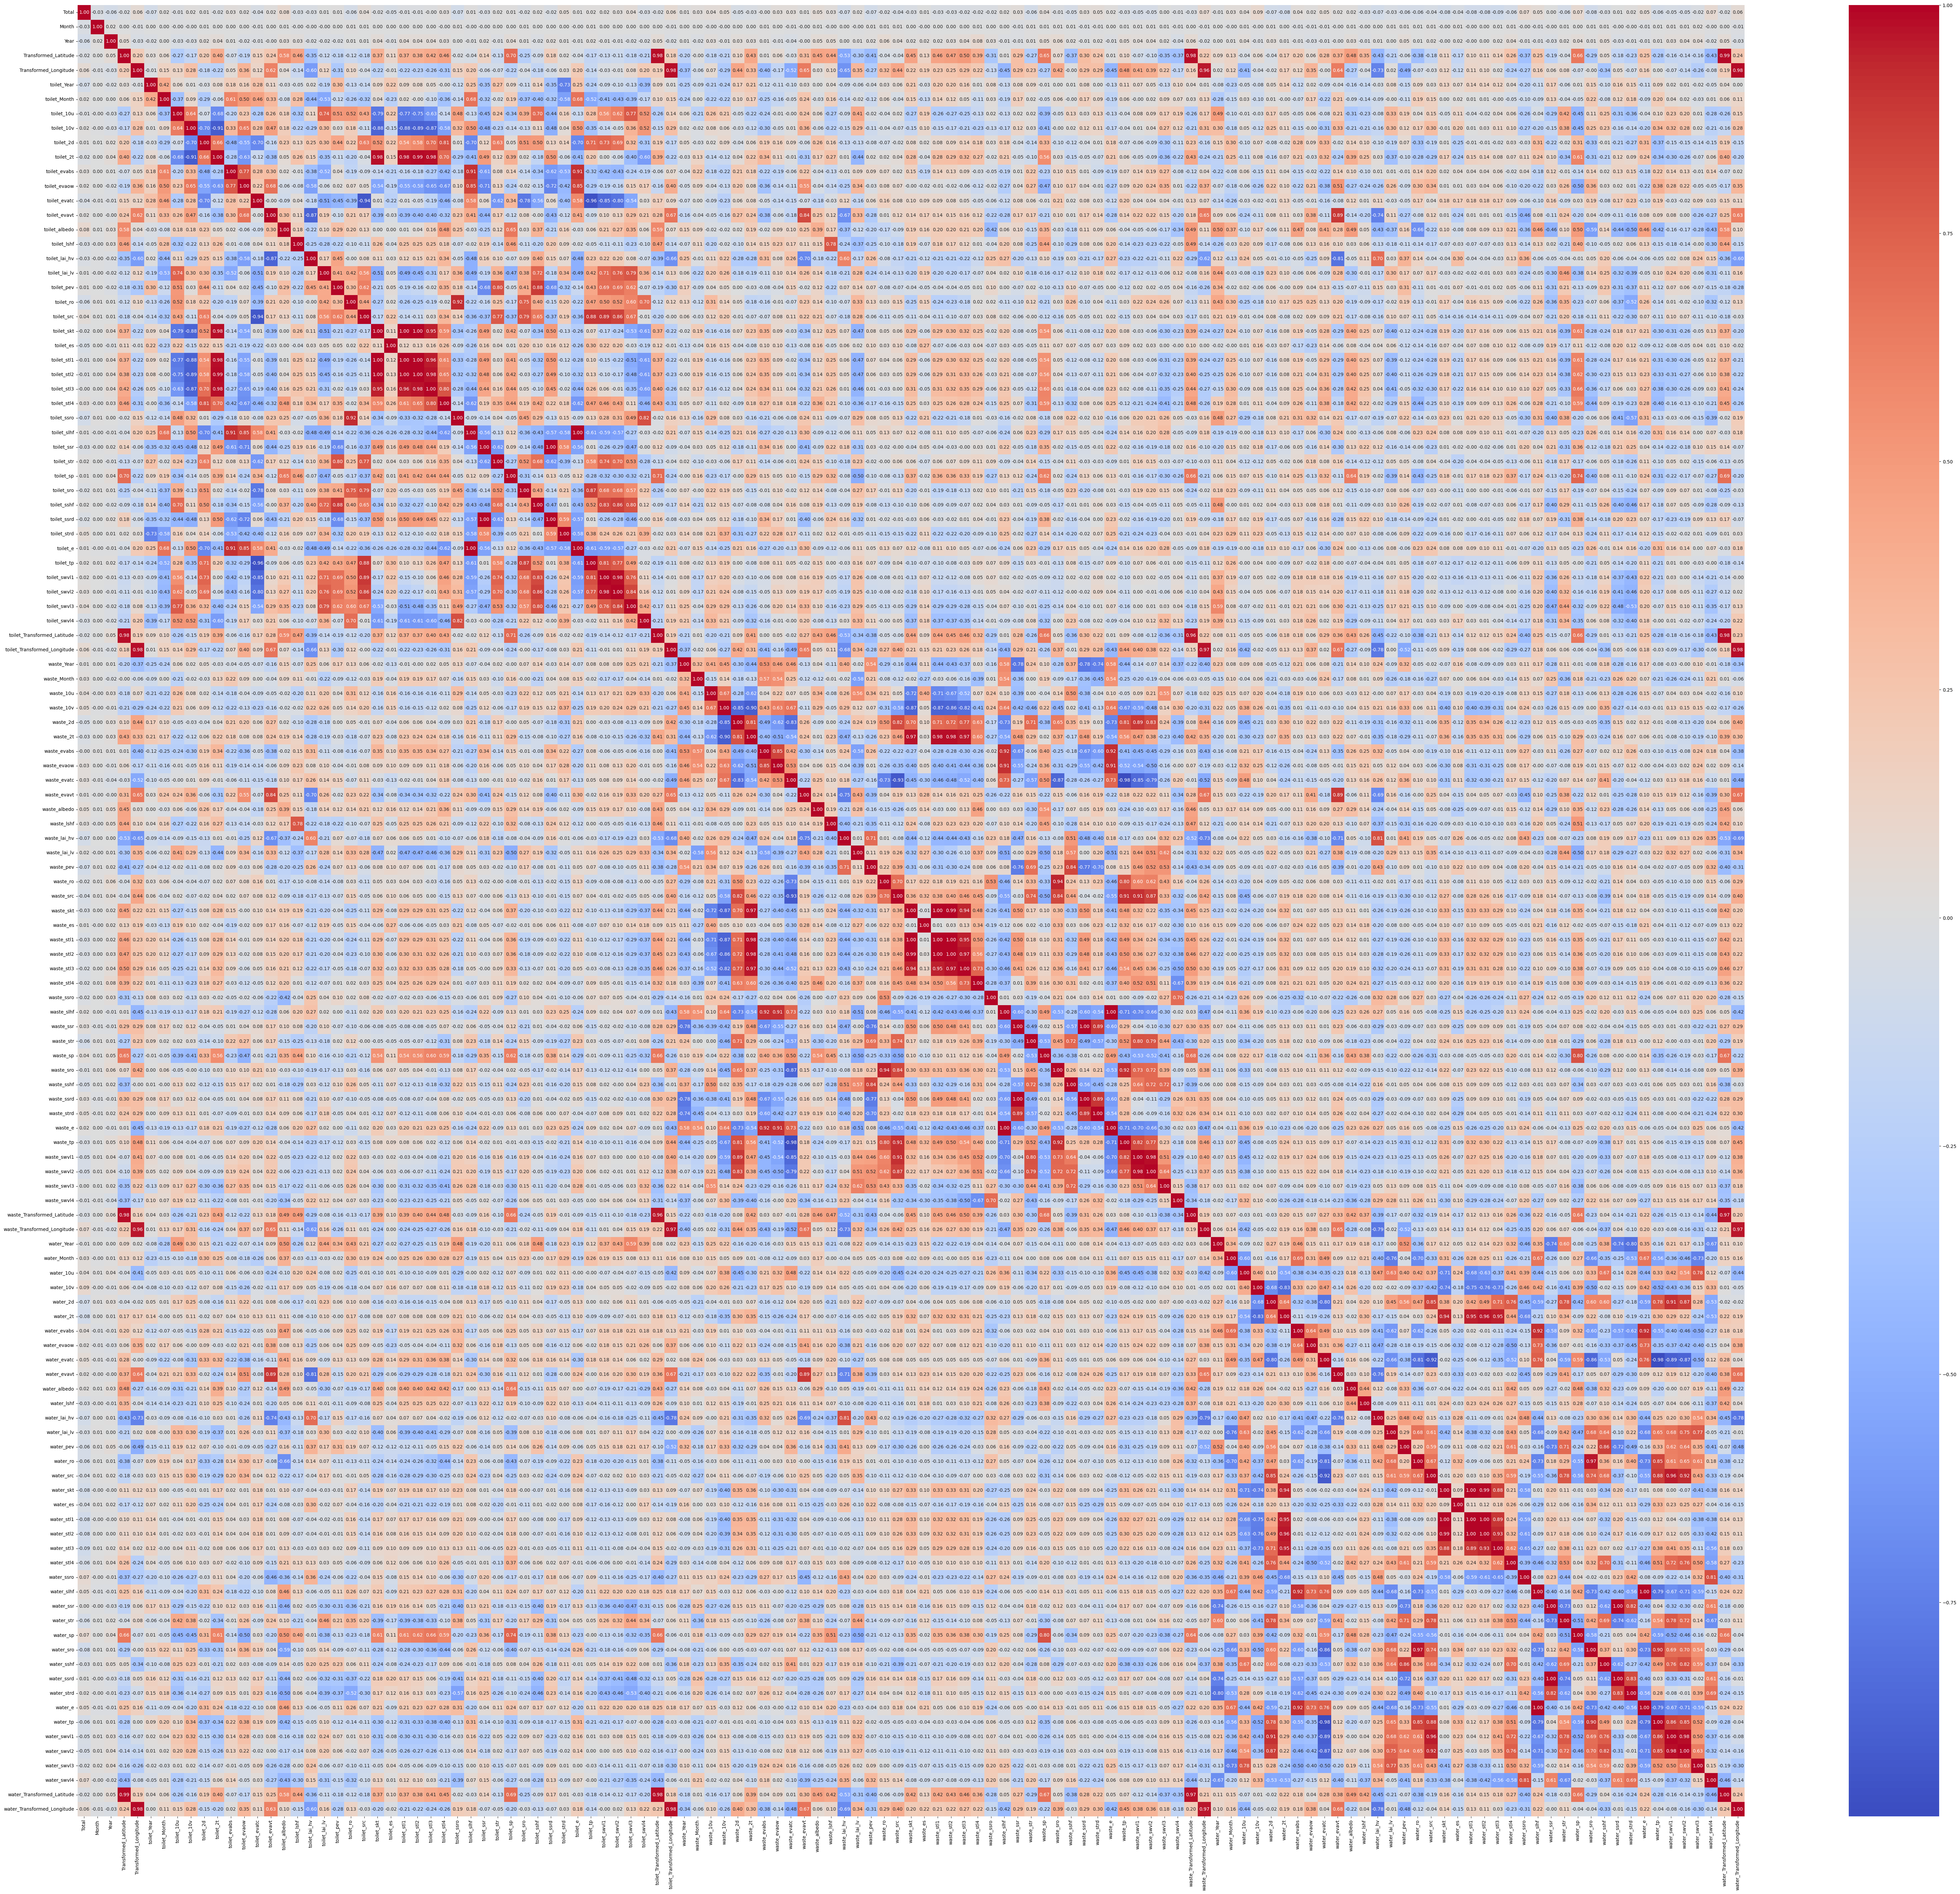

In [49]:
correlation_matrix = merged_data[columns_of_interest].corr()
plt.figure(figsize=(80,70))
sns.heatmap(correlation_matrix,annot=True, fmt='.2f', cmap='coolwarm')

In [50]:
threshold = 0.9

# Count the number of correlations for each column above the threshold
high_correlation_counts = (correlation_matrix.abs() > threshold).sum(axis=1) - 1  # Exclude self-correlation

# Extract columns with high correlations
high_correlation_columns = high_correlation_counts[high_correlation_counts > 0].index.tolist()

print("Columns with high correlations:", high_correlation_columns)


Columns with high correlations: ['Transformed_Latitude', 'Transformed_Longitude', 'toilet_10v', 'toilet_2t', 'toilet_evabs', 'toilet_evatc', 'toilet_ro', 'toilet_src', 'toilet_skt', 'toilet_stl1', 'toilet_stl2', 'toilet_stl3', 'toilet_ssro', 'toilet_slhf', 'toilet_ssr', 'toilet_ssrd', 'toilet_e', 'toilet_tp', 'toilet_swvl1', 'toilet_swvl2', 'toilet_Transformed_Latitude', 'toilet_Transformed_Longitude', 'waste_10v', 'waste_2t', 'waste_evabs', 'waste_evaow', 'waste_evatc', 'waste_ro', 'waste_src', 'waste_skt', 'waste_stl1', 'waste_stl2', 'waste_stl3', 'waste_slhf', 'waste_ssr', 'waste_sro', 'waste_ssrd', 'waste_e', 'waste_tp', 'waste_swvl1', 'waste_swvl2', 'waste_Transformed_Latitude', 'waste_Transformed_Longitude', 'water_2d', 'water_2t', 'water_evabs', 'water_evatc', 'water_ro', 'water_src', 'water_skt', 'water_stl1', 'water_stl2', 'water_stl3', 'water_slhf', 'water_ssr', 'water_sro', 'water_ssrd', 'water_e', 'water_tp', 'water_swvl1', 'water_swvl2', 'water_Transformed_Latitude', 'wate

In [51]:
correlated_pairs = (
    correlation_matrix.where(
        (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
    ).stack().reset_index()
)

# Rename columns for clarity
correlated_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

correlated_pairs_df=pd.DataFrame(correlated_pairs)

In [52]:
positive_relation_df=correlated_pairs_df[correlated_pairs_df['Correlation']>0]
inverse_relation_df=correlated_pairs_df[correlated_pairs_df['Correlation']<0]

In [53]:
positive_relation_df

Feature_1                     Feature_2  Correlation
0           Transformed_Latitude   toilet_Transformed_Latitude     0.983501
1           Transformed_Latitude    waste_Transformed_Latitude     0.980869
2           Transformed_Latitude    water_Transformed_Latitude     0.986414
3          Transformed_Longitude  toilet_Transformed_Longitude     0.979143
4          Transformed_Longitude   waste_Transformed_Longitude     0.964395
..                           ...                           ...          ...
145   water_Transformed_Latitude   toilet_Transformed_Latitude     0.983342
146   water_Transformed_Latitude    waste_Transformed_Latitude     0.971739
147  water_Transformed_Longitude         Transformed_Longitude     0.984770
148  water_Transformed_Longitude  toilet_Transformed_Longitude     0.980261
149  water_Transformed_Longitude   waste_Transformed_Longitude     0.966985

[134 rows x 3 columns]

In [54]:
positive_relation_df.sort_values(by='Correlation', ascending=False)

Feature_1    Feature_2  Correlation
84    waste_slhf      waste_e     1.000000
91       waste_e   waste_slhf     1.000000
130   water_slhf      water_e     1.000000
136      water_e   water_slhf     1.000000
36   toilet_slhf     toilet_e     1.000000
..           ...          ...          ...
59   waste_evaow      waste_e     0.911082
65     waste_src  waste_swvl1     0.910958
95   waste_swvl1    waste_src     0.910958
138     water_tp    water_sro     0.901071
133    water_sro     water_tp     0.901071

[134 rows x 3 columns]

In [55]:
inverse_relation_df

Feature_1     Feature_2  Correlation
6      toilet_10v     toilet_2t    -0.909321
7       toilet_2t    toilet_10v    -0.909321
14   toilet_evatc    toilet_src    -0.935903
15   toilet_evatc     toilet_tp    -0.959984
17     toilet_src  toilet_evatc    -0.935903
41      toilet_tp  toilet_evatc    -0.959984
50      waste_10v      waste_2t    -0.900382
51       waste_2t     waste_10v    -0.900382
60    waste_evatc     waste_src    -0.929947
61    waste_evatc      waste_tp    -0.978518
63      waste_src   waste_evatc    -0.929947
92       waste_tp   waste_evatc    -0.978518
111   water_evatc     water_src    -0.920083
112   water_evatc      water_tp    -0.984621
114     water_src   water_evatc    -0.920083
137      water_tp   water_evatc    -0.984621

## *Wind Component Relation*

In [61]:
# Check the first few rows and summary statistics
print(merged_data[['water_10u', 'waste_10u', 'toilet_10u']].describe())
print("\n")
print(merged_data[['water_10v', 'waste_10v', 'toilet_10v']].describe())


          water_10u     waste_10u    toilet_10u
count  24375.000000  24375.000000  24375.000000
mean      -0.862671     -0.711021     -0.846656
std        0.393378      0.394029      0.460439
min       -1.492400     -1.408560     -1.741580
25%       -1.164820     -1.045530     -1.364380
50%       -0.877717     -0.550600     -0.844635
75%       -0.544905     -0.360747     -0.416975
max       -0.171235     -0.126090     -0.268989


          water_10v     waste_10v    toilet_10v
count  24375.000000  24375.000000  24375.000000
mean       0.271829      0.286816      0.083711
std        0.519504      0.708776      0.671582
min       -0.740423     -0.814642     -0.866400
25%       -0.059830     -0.449936     -0.605727
50%        0.370181      0.423794      0.423794
75%        0.564784      0.965330      0.581028
max        1.265500      1.189820      1.184410


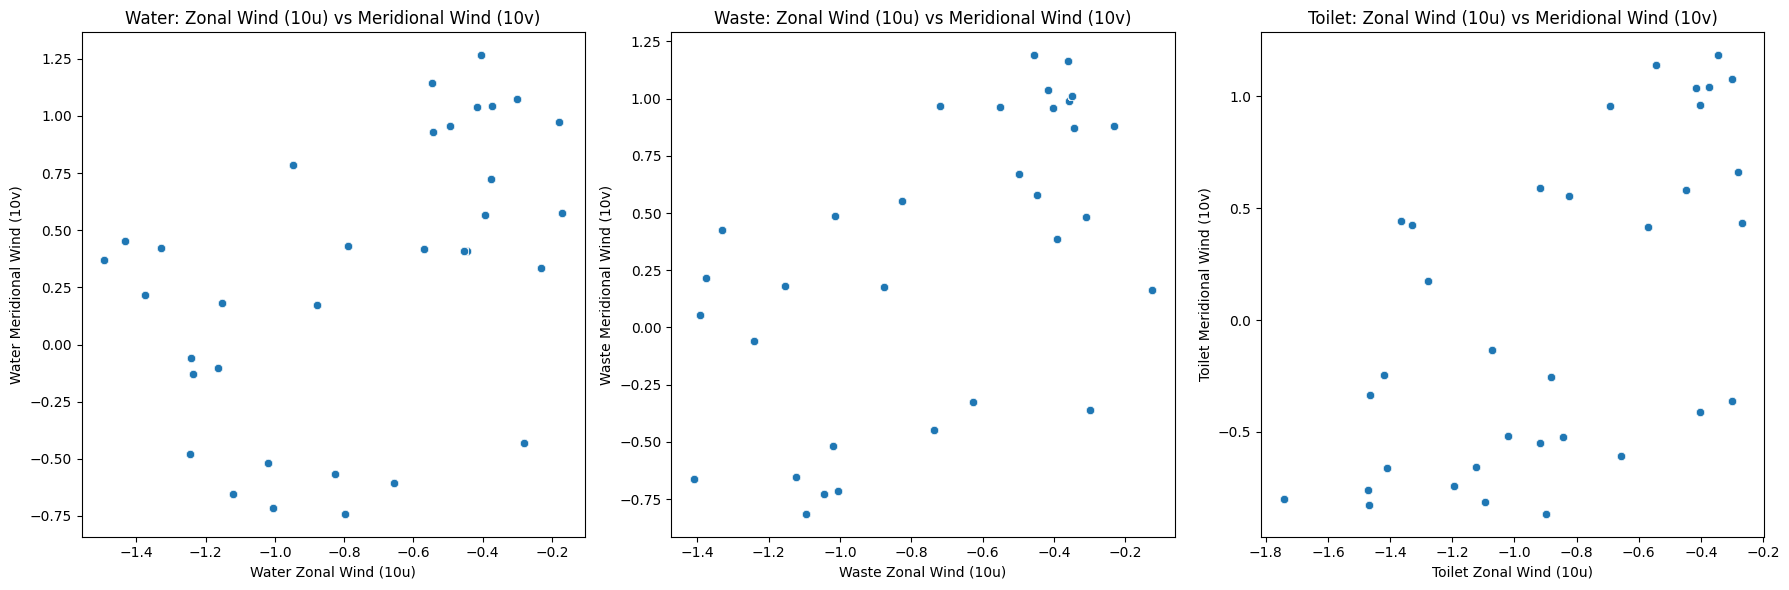

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=merged_data, x='water_10u', y='water_10v', ax=axes[0])
axes[0].set_title('Water: Zonal Wind (10u) vs Meridional Wind (10v)')
axes[0].set_xlabel('Water Zonal Wind (10u)')
axes[0].set_ylabel('Water Meridional Wind (10v)')

# Plot for Waste
sns.scatterplot(data=merged_data, x='waste_10u', y='waste_10v', ax=axes[1])
axes[1].set_title('Waste: Zonal Wind (10u) vs Meridional Wind (10v)')
axes[1].set_xlabel('Waste Zonal Wind (10u)')
axes[1].set_ylabel('Waste Meridional Wind (10v)')

# Plot for Toilet
sns.scatterplot(data=merged_data, x='toilet_10u', y='toilet_10v', ax=axes[2])
axes[2].set_title('Toilet: Zonal Wind (10u) vs Meridional Wind (10v)')
axes[2].set_xlabel('Toilet Zonal Wind (10u)')
axes[2].set_ylabel('Toilet Meridional Wind (10v)')

plt.tight_layout()
plt.show()

In [63]:
# Calculate correlation between 10u and 10v
correlation_10u_10v_water = merged_data[['water_10u', 'water_10v']].corr().iloc[0,1]
correlation_10u_10v_waste = merged_data[['waste_10u', 'waste_10v']].corr().iloc[0,1]
correlation_10u_10v_toilet = merged_data[['toilet_10u', 'toilet_10v']].corr().iloc[0,1]

print(f"Correlation between 10u and 10v (Water): {correlation_10u_10v_water}")
print(f"Correlation between 10u and 10v (Waste): {correlation_10u_10v_waste}")
print(f"Correlation between 10u and 10v (Toilet): {correlation_10u_10v_toilet}")


Correlation between 10u and 10v (Water): 0.40237473150381725
Correlation between 10u and 10v (Waste): 0.6656965489223945
Correlation between 10u and 10v (Toilet): 0.6409579823380398


## *Temperature and Dew Point Relation*

In [66]:
print(merged_data[['water_2t', 'waste_2t', 'toilet_2t']].describe())
print("\n")
print(merged_data[['water_2d', 'waste_2d', 'toilet_2d']].describe())

           water_2t      waste_2t    toilet_2t
count  24375.000000  24375.000000  24375.00000
mean     295.983472    295.960963    296.30787
std        1.218177      1.605826      1.68903
min      293.164000    293.323000    292.50500
25%      295.422000    294.521000    294.72600
50%      296.335000    295.910000    296.08900
75%      296.832000    297.417000    297.87600
max      298.543000    298.678000    298.93700


           water_2d      waste_2d     toilet_2d
count  24375.000000  24375.000000  24375.000000
mean     290.807007    290.848815    291.665772
std        2.439938      2.613483      2.259936
min      286.339000    286.886000    286.339000
25%      288.471000    288.099000    290.366000
50%      290.625000    290.366000    292.571000
75%      293.005000    293.502000    293.421000
max      294.638000    295.048000    294.638000


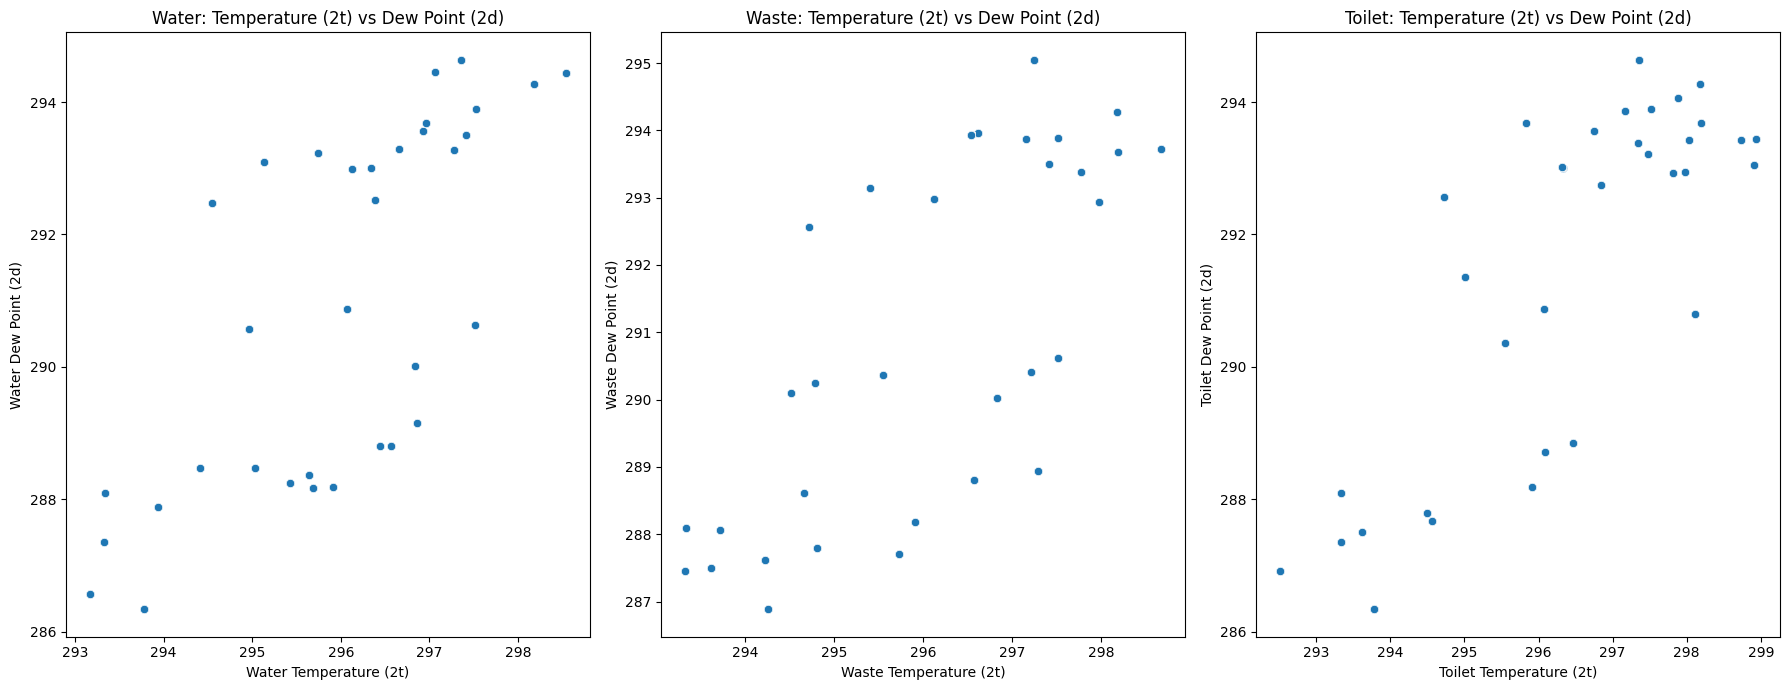

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plot for Water
sns.scatterplot(data=merged_data, x='water_2t', y='water_2d', ax=axes[0])
axes[0].set_title('Water: Temperature (2t) vs Dew Point (2d)')
axes[0].set_xlabel('Water Temperature (2t)')
axes[0].set_ylabel('Water Dew Point (2d)')

# Plot for Waste
sns.scatterplot(data=merged_data, x='waste_2t', y='waste_2d', ax=axes[1])
axes[1].set_title('Waste: Temperature (2t) vs Dew Point (2d)')
axes[1].set_xlabel('Waste Temperature (2t)')
axes[1].set_ylabel('Waste Dew Point (2d)')

# Plot for Toilet
sns.scatterplot(data=merged_data, x='toilet_2t', y='toilet_2d', ax=axes[2])
axes[2].set_title('Toilet: Temperature (2t) vs Dew Point (2d)')
axes[2].set_xlabel('Toilet Temperature (2t)')
axes[2].set_ylabel('Toilet Dew Point (2d)')

plt.tight_layout()
plt.show()

In [73]:
# Calculate correlation between 2t and 2d
correlation_2t_2d_water = merged_data[['water_2t', 'water_2d']].corr().iloc[0,1]
correlation_2t_2d_waste = merged_data[['waste_2t', 'waste_2d']].corr().iloc[0,1]
correlation_2t_2d_toilet = merged_data[['toilet_2t', 'toilet_2d']].corr().iloc[0,1]

print(f"Correlation between 2t and 2d (Water): {correlation_2t_2d_water}")
print(f"Correlation between 2t and 2d (Waste): {correlation_2t_2d_waste}")
print(f"Correlation between 2t and 2d (Toilet): {correlation_2t_2d_toilet}")


Correlation between 2t and 2d (Water): 0.6391480982563297
Correlation between 2t and 2d (Waste): 0.8052179462785576
Correlation between 2t and 2d (Toilet): 0.664507070976397


## *Evapotranspiration and Evaporation Relation*

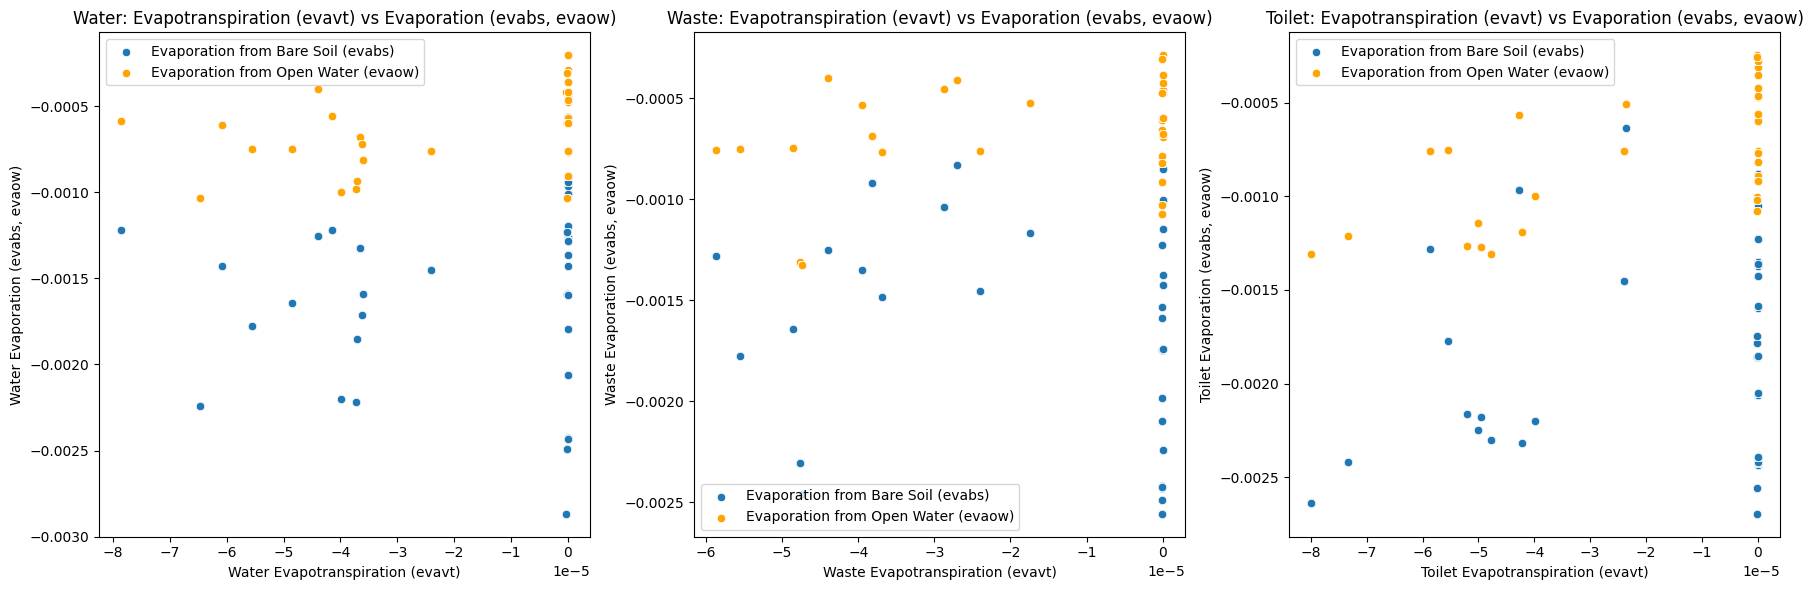

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Water
sns.scatterplot(data=merged_data, x='water_evavt', y='water_evabs', ax=axes[0], label='Evaporation from Bare Soil (evabs)')
sns.scatterplot(data=merged_data, x='water_evavt', y='water_evaow', ax=axes[0], label='Evaporation from Open Water (evaow)', color='orange')
axes[0].set_title('Water: Evapotranspiration (evavt) vs Evaporation (evabs, evaow)')
axes[0].set_xlabel('Water Evapotranspiration (evavt)')
axes[0].set_ylabel('Water Evaporation (evabs, evaow)')
axes[0].legend()

# Plot for Waste
sns.scatterplot(data=merged_data, x='waste_evavt', y='waste_evabs', ax=axes[1], label='Evaporation from Bare Soil (evabs)')
sns.scatterplot(data=merged_data, x='waste_evavt', y='waste_evaow', ax=axes[1], label='Evaporation from Open Water (evaow)', color='orange')
axes[1].set_title('Waste: Evapotranspiration (evavt) vs Evaporation (evabs, evaow)')
axes[1].set_xlabel('Waste Evapotranspiration (evavt)')
axes[1].set_ylabel('Waste Evaporation (evabs, evaow)')
axes[1].legend()

# Plot for Toilet
sns.scatterplot(data=merged_data, x='toilet_evavt', y='toilet_evabs', ax=axes[2], label='Evaporation from Bare Soil (evabs)')
sns.scatterplot(data=merged_data, x='toilet_evavt', y='toilet_evaow', ax=axes[2], label='Evaporation from Open Water (evaow)', color='orange')
axes[2].set_title('Toilet: Evapotranspiration (evavt) vs Evaporation (evabs, evaow)')
axes[2].set_xlabel('Toilet Evapotranspiration (evavt)')
axes[2].set_ylabel('Toilet Evaporation (evabs, evaow)')
axes[2].legend()

plt.tight_layout()
plt.show()

In [77]:
print("Water")
print("evavt_evabs:", merged_data['water_evavt'].corr(merged_data['water_evabs']))
print("evavt_evaow:", merged_data['water_evavt'].corr(merged_data['water_evaow']))

print("\nWaste")
print("evavt_evabs:", merged_data['waste_evavt'].corr(merged_data['waste_evabs']))
print("evavt_evaow:", merged_data['waste_evavt'].corr(merged_data['waste_evaow']))

print("\nToilet")
print("evavt_evabs:", merged_data['toilet_evavt'].corr(merged_data['toilet_evabs']))
print("evavt_evaow:", merged_data['toilet_evavt'].corr(merged_data['toilet_evaow']))


Water
evavt_evabs: 0.09906429499981485
evavt_evaow: 0.35553801435979226

Waste
evavt_evabs: -0.302276500432431
evavt_evaow: 0.035285767547902885

Toilet
evavt_evabs: 0.29742999631634126
evavt_evaow: 0.6816293888897632
